In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
import fastai
from fastai.imports import *

from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import skimage
from skimage.transform import*

/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
PATH = "/scratch/kk4ze/data_lowres_1100x1100_augmented_duplicated/"
sz=1100

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [6]:
os.listdir(PATH)

['models', 'tmp', 'valid', '.ipynb_checkpoints', 'train']

In [7]:
files = os.listdir(f'{PATH}valid/Celiac')[:5]
files

['C04-17_05_12764_7763_horiz__0_0.jpg',
 'C12-63_03_10776_11106_vert__1_0.jpg',
 'C07-37_06_8055_8580_vert__0_0.jpg',
 'C03-12_01_4376_5379_vert__1_0.jpg',
 'C06-33_02_8189_5011_horiz__0_0.jpg']

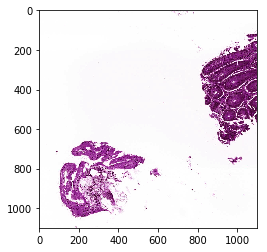

In [8]:
img = plt.imread(f'{PATH}valid/Celiac/{files[4]}')
plt.imshow(img);

In [9]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),bs=4)


In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 61/61 [00:15<00:00,  4.23it/s]


In [11]:
learn.fit(0.0001, 20)

epoch      trn_loss   val_loss   accuracy                    
    0      0.966872   0.648406   0.781893  
    1      0.761378   0.578064   0.765432                     
    2      0.691864   0.510863   0.794239                     
    3      0.700522   0.49903    0.781893                     
    4      0.54644    0.457983   0.835391                     
    5      0.562643   0.468576   0.831276                     
    6      0.627121   0.481058   0.82716                      
    7      0.492442   0.492418   0.823045                     
    8      0.577777   0.450335   0.81893                      
    9      0.509248   0.441225   0.839506                     
    10     0.517839   0.444086   0.843621                     
    11     0.506155   0.427002   0.843621                     
    12     0.469937   0.438908   0.847737                     
    13     0.445763   0.457634   0.8107                       
    14     0.458183   0.47909    0.806584                     
    15     0

[0.4507772181750325, 0.8271604940724471]

## Visualising Results

In [12]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [13]:
# from here we know that 'Celiac' is label 0 and 'EE' is label 1 and 'Normal' is label 2
data.classes

['Celiac', 'EE', 'Normal']

In [14]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(243, 3)

Most Correct Celiac


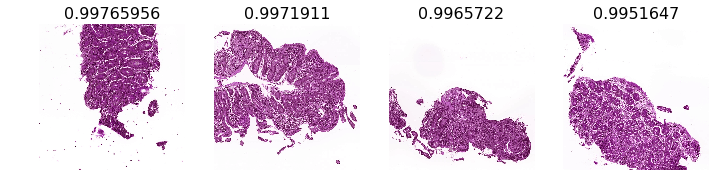

In [15]:
imr = ImageModelResults(data.val_ds, log_preds)
print('Most Correct Celiac')
imr.plot_most_correct(0)

Most Correct EE


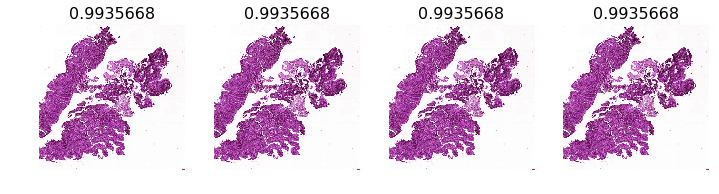

In [16]:
print('Most Correct EE')
imr.plot_most_correct(1)

Most Correct Normal


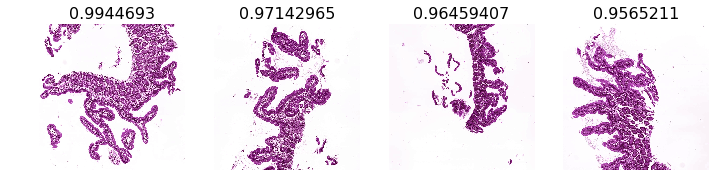

In [17]:
print('Most Correct Normal')
imr.plot_most_correct(2)

Most Incorrect Celiac


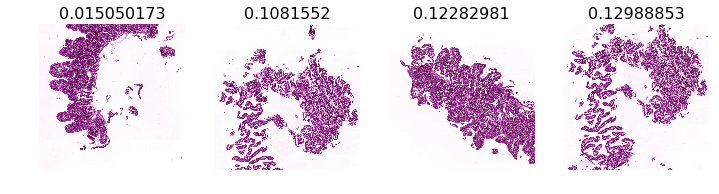

In [18]:
print('Most Incorrect Celiac')
imr.plot_most_incorrect(0)

Most Incorrect EE


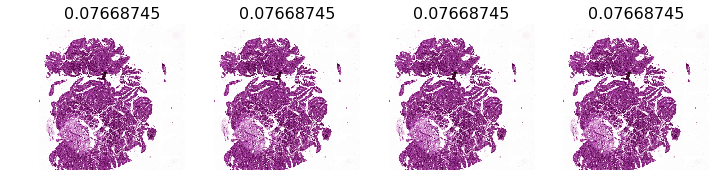

In [19]:
print('Most Incorrect EE')
imr.plot_most_incorrect(1)

Most Incorrect Normal


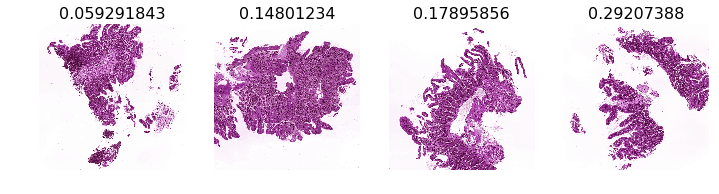

In [20]:
print('Most Incorrect Normal')
imr.plot_most_incorrect(2)

In [21]:
preds = np.argmax(log_preds, axis=1)

In [22]:
y = data.val_y

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[72  1 10]
 [12 66  6]
 [11  2 63]]


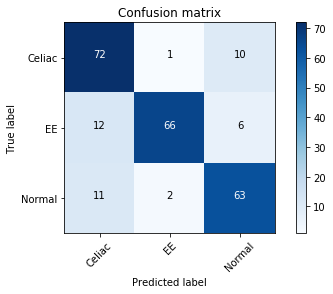

In [24]:
plot_confusion_matrix(cm, data.classes)

## Finding a optimum learning rate

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [26]:
lrf=learn.lr_find()

 68%|██████▊   | 178/263 [00:00<00:00, 424.79it/s, loss=3.45]


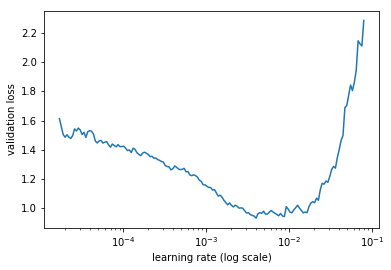

In [27]:
learn.sched.plot()

## Data Augmentation

In [28]:
# Using predefined augmentations transforms_top_down
tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

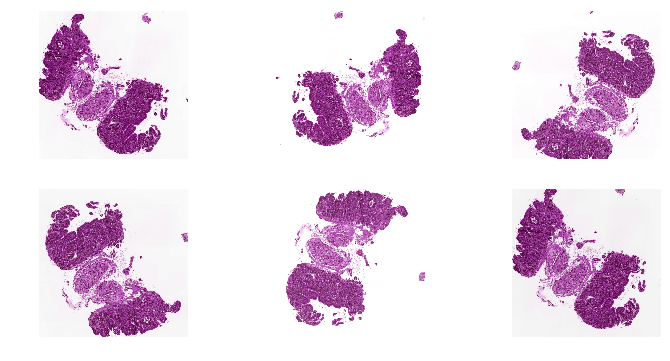

In [29]:
# Visualising the augmentation
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]
ims = np.stack([get_augs() for i in range(6)])
plots(ims, rows=2)

In [30]:
# Initializing the data with augmentation and learn method
data = ImageClassifierData.from_paths(PATH, tfms=tfms,bs=4)
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.precompute = False

In [31]:
lrf=learn.lr_find()

 68%|██████▊   | 178/263 [00:40<00:20,  4.21it/s, loss=4.29]

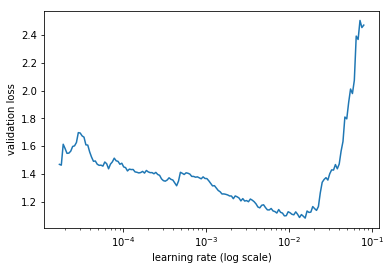

In [32]:
learn.sched.plot()

In [33]:
learn.fit(0.0009, 10, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.841922   0.745517   0.679012  
    1      0.671587   0.612829   0.662551                    
    2      0.693721   0.52242    0.761317                    
    3      0.670706   0.553079   0.670782                    
    4      0.685673   0.645246   0.654321                    
    5      0.712194   0.543455   0.73251                     
    6      0.684185   0.566782   0.674897                    
    7      0.602758   0.688726   0.646091                    
    8      0.529232   0.536849   0.73251                     
    9      0.762938   0.563252   0.720165                    


[0.5632522241078286, 0.7201646092987846]

In [34]:
learn.save('1100_lastlayer_duplicated_resnet50_lowres_staintools')

In [35]:
learn.load('1100_lastlayer_duplicated_resnet50_lowres_staintools')

## Creating GradCam Heatmaps

In [36]:
class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): self.features = output
    def remove(self): self.hook.remove()


def plt_heatmap():
    
    m = nn.Sequential(*children(learn.model))
    figure = plt.figure(figsize=(20, 20))

    for i in range(6):
        subplot = figure.add_subplot(3, 3, i+1)
        subplot.axis('Off')

        x,y = next(iter(data.val_dl))
        x,y = x[None,i], y[None,i]
        vx = Variable(x.cuda(), requires_grad=True)
        dx = data.val_ds.denorm(x)[0]
        sfs = [SaveFeatures(o) for o in [m[-11][2]._modules['conv2']]]
        py = m(vx)
        for o in sfs: o.remove()
        feat = np.maximum(0,to_np(sfs[0].features[0]))
        vx = Variable(x.cuda(), requires_grad=True)
        py = np.exp(to_np(py)[0])
        params = list(m.parameters())
        weight_softmax = np.squeeze(params[-2].data.cpu().numpy())
        f2=np.dot(np.rollaxis(feat,0,3), weight_softmax[0])
        f2-=f2.min()
        f2/=f2.max()
        plt.imshow(dx)
        plt.imshow(scipy.misc.imresize(f2, dx.shape), alpha=0.5, cmap='hot');

/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


IndexError: index 4 is out of bounds for dimension 1 with size 4

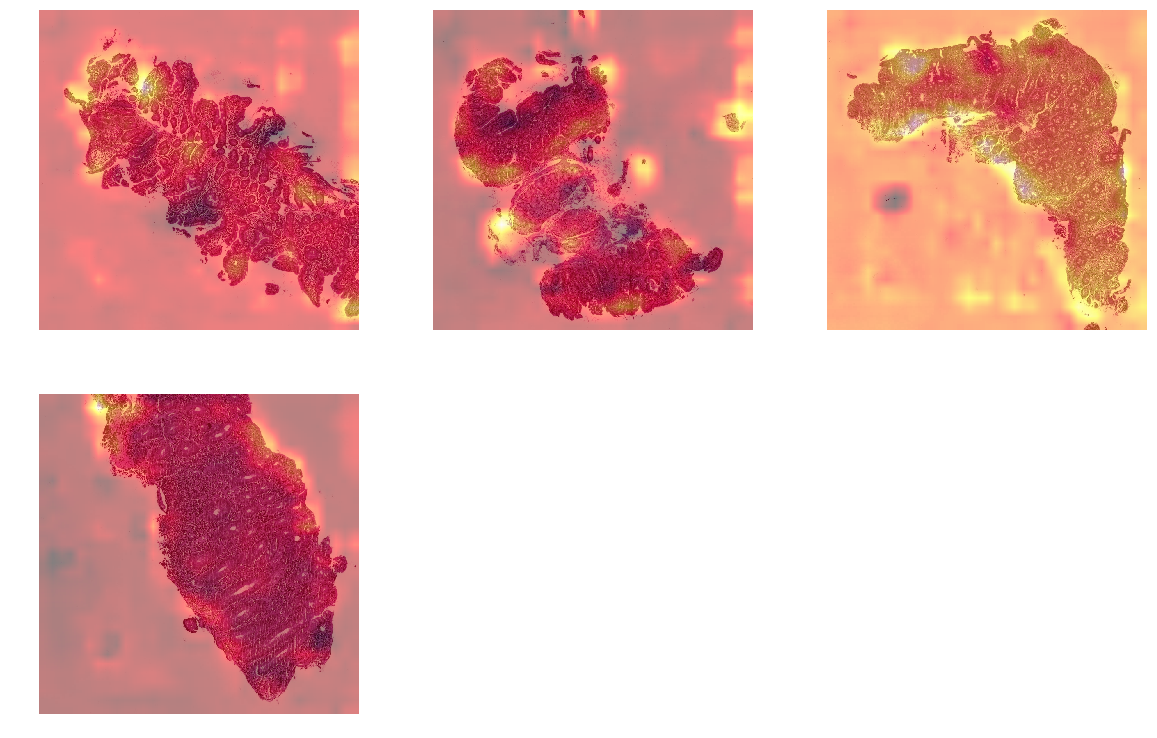

In [37]:
plt_heatmap()

## Unfreezing layers and using Differential learning rates

In [38]:
# Unfreeze all layers for training
learn.unfreeze()

In [39]:
lrf=learn.lr_find()

 66%|██████▌   | 174/263 [01:47<00:54,  1.64it/s, loss=3.32]

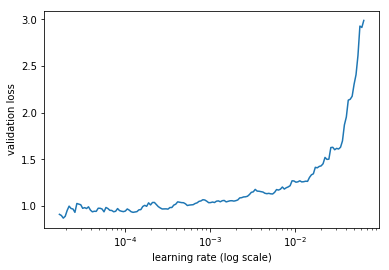

In [40]:
learn.sched.plot()

In [41]:
lr = (1e-2 + 1e-3)/2

In [42]:
lr=np.array([lr/9,lr/3,lr])

In [43]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.412575   1.037065   0.444444  
    1      1.639451   1.160722   0.452675                   
    2      1.333307   0.912376   0.576132                   
    3      1.718342   2.847334   0.304527                   
    4      1.412568   0.805001   0.617284                   
    5      1.0204     0.799027   0.666667                   
    6      0.955718   0.735028   0.687243                    


[0.7350276016894682, 0.687242798599196]

In [46]:
learn.save('1100_lowres_resnet50_staintools_duplicated')

In [47]:
learn.load('1100_lowres_resnet50_staintools_duplicated')

## Analyzing results

### Confusion Matrix and Accuracy with Test Time Augmentation

In [44]:
# Getting log predictions with TTA
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.7489711934156379

In [45]:
log_preds.shape

(5, 243, 3)

In [48]:
np.save('/scratch/kk4ze/data_lowres_1100x1100_augmented_duplicated/logpreds_resnet34_all_layers2200x2200_duplicates_TTA_staintools.npy', log_preds)

In [49]:
log_preds = np.load('/scratch/kk4ze/data_lowres_1100x1100_augmented_duplicated/logpreds_resnet34_all_layers2200x2200_duplicates_TTA_staintools.npy')

In [50]:
log_preds_mean = np.mean(log_preds, 0)

In [51]:
preds = np.argmax(probs, axis=1)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[50 12 21]
 [18 63  3]
 [ 4  3 69]]


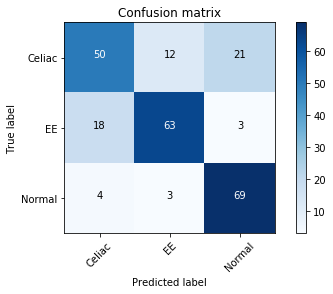

In [53]:
plot_confusion_matrix(cm, data.classes)

### Visualizing results with TTA

Most Correct Celiac


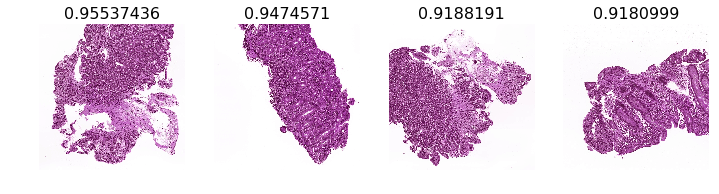

In [54]:
imr = ImageModelResults(data.val_ds, log_preds_mean)
print('Most Correct Celiac')
imr.plot_most_correct(0)

Most Correct EE


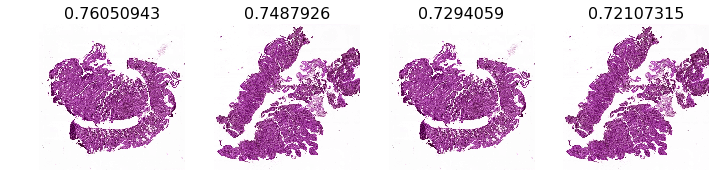

In [55]:
print('Most Correct EE')
imr.plot_most_correct(1)

Most Correct Noraml


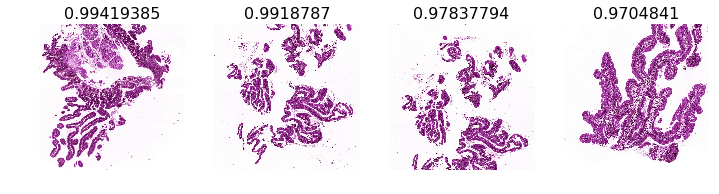

In [56]:
print('Most Correct Noraml')
imr.plot_most_correct(2)

Most Incorrect Celiac


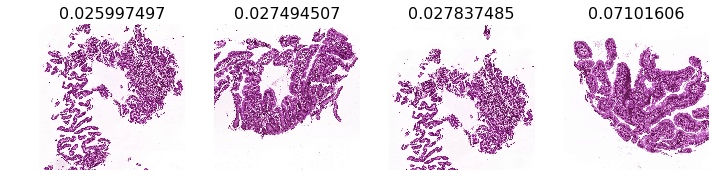

In [57]:
print('Most Incorrect Celiac')
imr.plot_most_incorrect(0)

Most Incorrect EE


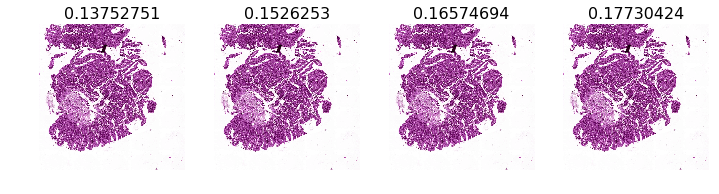

In [58]:
print('Most Incorrect EE')
imr.plot_most_incorrect(1)

Most Incorrect Normal


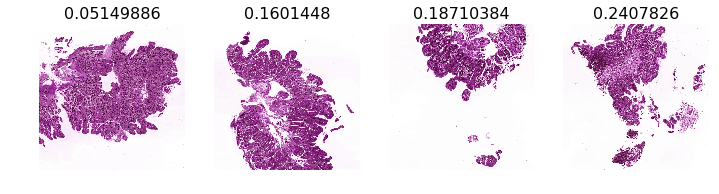

In [59]:
print('Most Incorrect Normal')
imr.plot_most_incorrect(2)

Most Uncertain Celiac


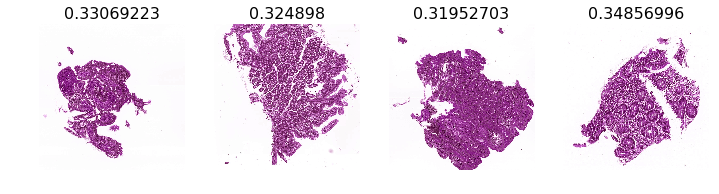

In [60]:
print('Most Uncertain Celiac')
imr.plot_most_uncertain(0)

Most Uncertain EE


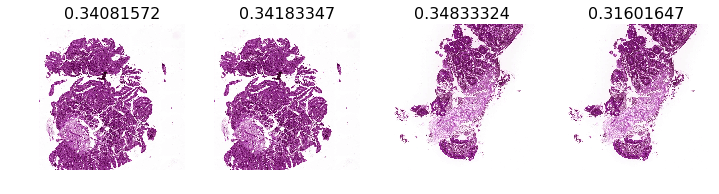

In [61]:
print('Most Uncertain EE')
imr.plot_most_uncertain(1)

Most Uncertain Normal


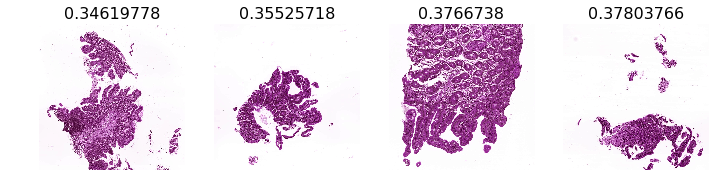

In [62]:
print('Most Uncertain Normal')
imr.plot_most_uncertain(2)

### Confusion Matrix and Accuracy without Test Time Augmentation

In [63]:
# Getting log predictions without TTA
log_preds = learn.predict()

In [64]:
preds = np.argmax(log_preds, axis=1)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[48 11 24]
 [30 48  6]
 [ 3  2 71]]


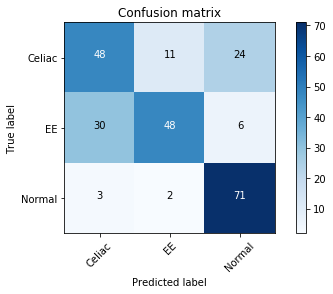

In [66]:
plot_confusion_matrix(cm, data.classes)

## Saving predictions of the model with TTA

In [67]:
np.exp(log_preds_mean)

array([[0.38073, 0.17295, 0.3968 ],
       [0.3597 , 0.56728, 0.05297],
       [0.31175, 0.66487, 0.01922],
       [0.94746, 0.03179, 0.01045],
       [0.48168, 0.37998, 0.09973],
       [0.80087, 0.14379, 0.03872],
       [0.72152, 0.16636, 0.06232],
       [0.85835, 0.00683, 0.11354],
       [0.08808, 0.22908, 0.61649],
       [0.46646, 0.22658, 0.27237],
       [0.56812, 0.31841, 0.08149],
       [0.65712, 0.24026, 0.08705],
       [0.22493, 0.11421, 0.51762],
       [0.53077, 0.31774, 0.11917],
       [0.31558, 0.13391, 0.51468],
       [0.66506, 0.12957, 0.15435],
       [0.86071, 0.09985, 0.03072],
       [0.7008 , 0.26548, 0.00616],
       [0.18244, 0.79696, 0.0107 ],
       [0.83994, 0.05697, 0.07884],
       [0.9181 , 0.04261, 0.02317],
       [0.77265, 0.1351 , 0.01127],
       [0.24777, 0.57724, 0.15569],
       [0.25559, 0.13721, 0.54502],
       [0.68471, 0.16182, 0.07419],
       [0.3249 , 0.04175, 0.59439],
       [0.53359, 0.17734, 0.21754],
       [0.79521, 0.09051, 0.

In [68]:
res = pd.DataFrame(np.exp(log_preds_mean))

In [69]:
res['file'] = data.val_ds.fnames

In [70]:
res.columns = ['Celiac', 'EE', 'Normal', 'FileName']

In [71]:
res.to_csv('/scratch/kk4ze/data_lowres_1100x1100_augmented_duplicated/preds_resnet50_1100_duplicates_TTA_staintools.csv')

In [72]:
res.head()

,Celiac,EE,Normal,FileName
0,0.380725,0.172952,0.396803,valid/Celiac/C04-17_05_12764_7763_horiz__0_0.jpg
1,0.359698,0.567283,0.052968,valid/Celiac/C12-63_03_10776_11106_vert__1_0.jpg
2,0.311753,0.664868,0.019217,valid/Celiac/C07-37_06_8055_8580_vert__0_0.jpg
3,0.947457,0.031793,0.010449,valid/Celiac/C03-12_01_4376_5379_vert__1_0.jpg
4,0.481682,0.379980,0.099735,valid/Celiac/C06-33_02_8189_5011_horiz__0_0.jpg
